## Problem Statement:

**In the highly competitive telecom industry, retaining existing customers has become a critical challenge.**

**As acquiring new customers is more expensive than retaining existing ones, telecom companies must focus on customer retention.**

**This analysis aims to understand customer behavior and build a machine learning model to predict whether a customer has churned (left the service) or not, based on historical data.** 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
data = df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
data.shape

(7043, 21)

In [45]:
len(data.customerID.unique())

7043

- As this customerID feature is not going to add any value to our model, we can drop it to improve model performance and reduce computations

In [47]:
data.drop('customerID', inplace = True, axis = 1)

In [49]:
data.shape

(7043, 20)

In [51]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [53]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [57]:
# Changing the data type of "TotalCharges" column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [59]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [61]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [63]:
# # Converting the SeniorCitizen column into object data type
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)


In [65]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
# empty_cells = data['TotalCharges'].apply(lambda x: x.strip() == '' if isinstance(x, str) else False)
# print(empty_cells.sum())  # Counts the number of "empty" cells

In [67]:
data.isnull().sum() / len(data) * 100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

**Now we got a dataset free of NULL values, but also let's check for the duplicates, if there are no duplicates then we can proceed further**

In [69]:
# As the percentage of null rows is very less, we can drop them
data.dropna(subset=["TotalCharges"], inplace=True)

In [73]:
data.shape

(7032, 20)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [79]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [81]:
data.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Univariate Analysis

In [83]:
def cont_vis_analysis(data,col):
    fig,axes = plt.subplots(1,3,figsize=(10,4), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions')

    axes[0].set_title('Histogram')
    sns.histplot(data[col],ax=axes[0])

    axes[1].set_title('KDE Plot')
    sns.kdeplot(data[col],ax=axes[1])

    axes[2].set_title('Box Plot')
    sns.boxplot(data[col],ax=axes[2])

    fig.show()

    # Non-Visual Analysis of continuous variables

def cont_non_visual_analysis(data,col):
    series = data[col]
    print('Non-Visual Analysis')
    print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']))
    print('-'*20)

Non-Visual Analysis
count     7032.000000
min          1.000000
max         72.000000
mean        32.421786
median      29.000000
var        602.469774
std         24.545260
skew         0.237731
kurt        -1.387823
Name: tenure, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


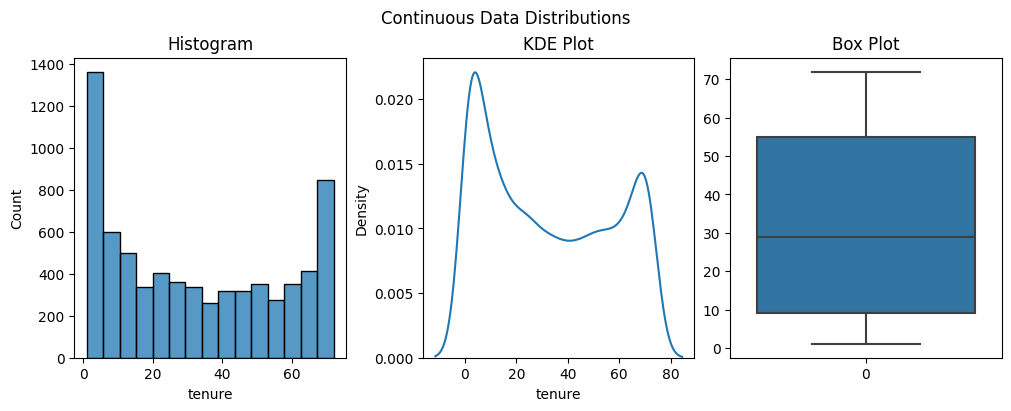

In [104]:
cont_non_visual_analysis(data,'tenure')
cont_vis_analysis(data,'tenure')

- The 'tenure' column is having positive skewnwss which is almost equal to zero
- And also having negative kurtosis which means flat curve and light tails
- Almost looking like almost normal distribution

Non-Visual Analysis
count     7032.000000
min         18.250000
max        118.750000
mean        64.798208
median      70.350000
var        905.165825
std         30.085974
skew        -0.222103
kurt        -1.256156
Name: MonthlyCharges, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


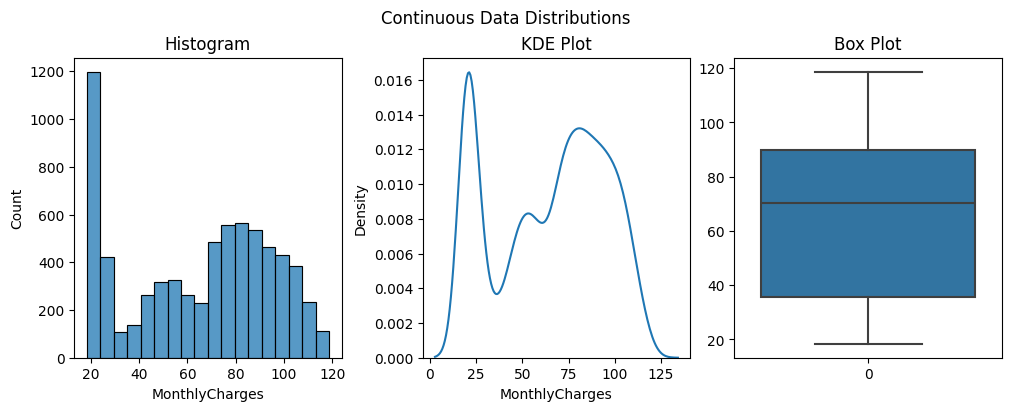

In [106]:
cont_non_visual_analysis(data,'MonthlyCharges')
cont_vis_analysis(data,'MonthlyCharges')

- The skewness is negative but near to zero, which meant to be almost following normal distribution
- And the kurtosis is negative as same as the above feature

Non-Visual Analysis
count     7.032000e+03
min       1.880000e+01
max       8.684800e+03
mean      2.283300e+03
median    1.397475e+03
var       5.138252e+06
std       2.266771e+03
skew      9.616425e-01
kurt     -2.317988e-01
Name: TotalCharges, dtype: float64
--------------------


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\73736659.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


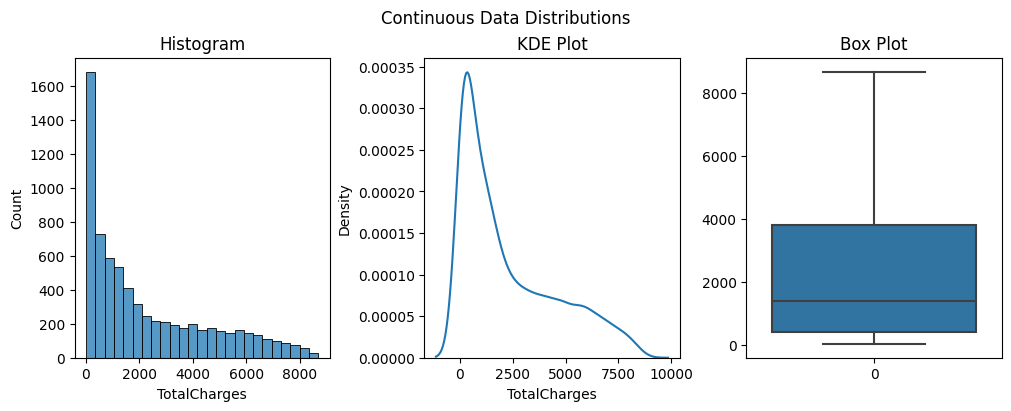

In [108]:
cont_non_visual_analysis(data,'TotalCharges')
cont_vis_analysis(data,'TotalCharges')

- Skewness (0.9616): Indicates a slight positive asymmetry in the distribution, leaning slightly to the right.
- Kurtosis (-0.2318): Suggests the distribution is flatter with fewer outliers compared to a normal curve.

In [85]:
def cat_vis_analysis(data,col):

    print('Value counts for column: ',col)
    print(data[col].value_counts())
    print('Null values in: ')
    print(data[col].isnull().sum())
    
    fig,axes = plt.subplots(1,2,figsize=(10,3),layout='constrained')
    plt.suptitle('Categorical Data Distributions')

    axes[0].set_title('Bar Chart')
    sns.countplot(x=col,data=data,ax = axes[0])
    
    axes[1].set_title('Pie Chart')
    vc_data = data[col].value_counts()
    axes[1].pie(vc_data, labels = vc_data, autopct = '%1.1f%%')

    fig.show()

In [137]:
data.select_dtypes(include='object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Value counts for column:  gender
gender
Male      3549
Female    3483
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


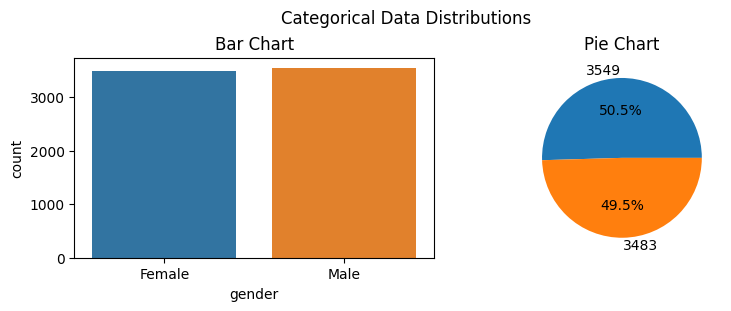

In [134]:
cat_vis_analysis(data,'gender')

Value counts for column:  SeniorCitizen
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_20732\1826437253.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


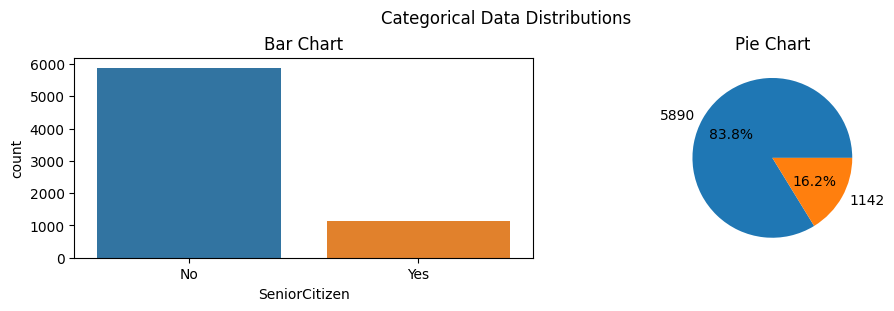

In [139]:
cat_vis_analysis(data,'SeniorCitizen')

Value counts for column:  Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


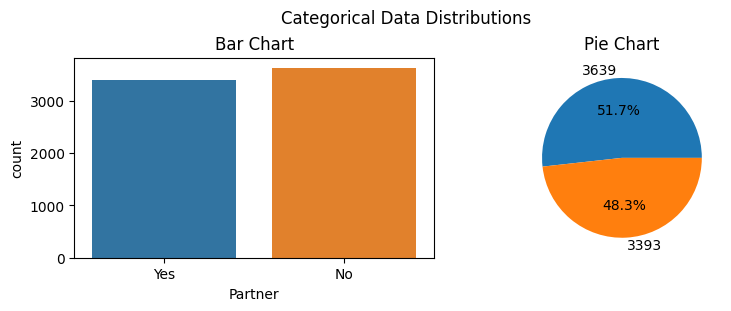

In [136]:
cat_vis_analysis(data,'Partner')

Value counts for column:  Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


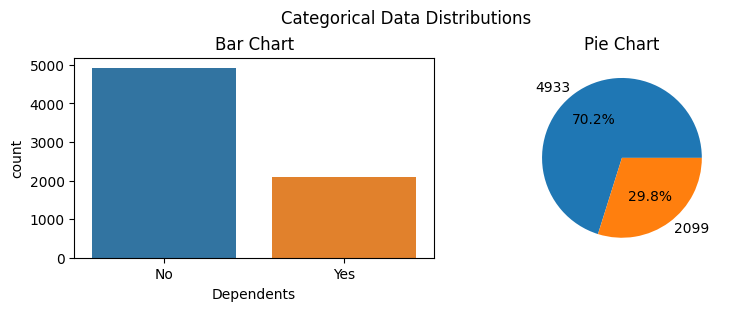

In [138]:
cat_vis_analysis(data,'Dependents')

Value counts for column:  PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


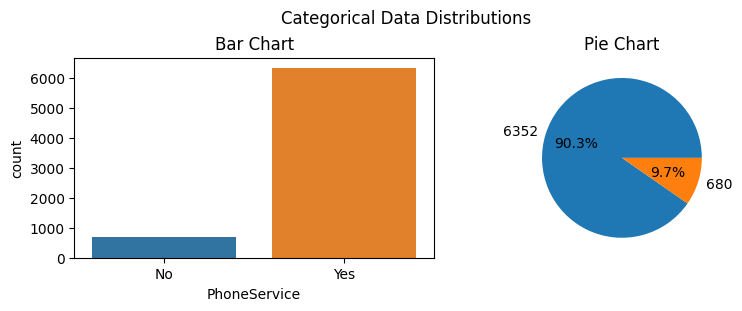

In [140]:
cat_vis_analysis(data,'PhoneService')

In [75]:
pd.crosstab(data['PhoneService'], data['Churn'], normalize='index')

Churn,No,Yes
PhoneService,,
No,0.750000,0.250000
Yes,0.732525,0.267475


Value counts for column:  MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


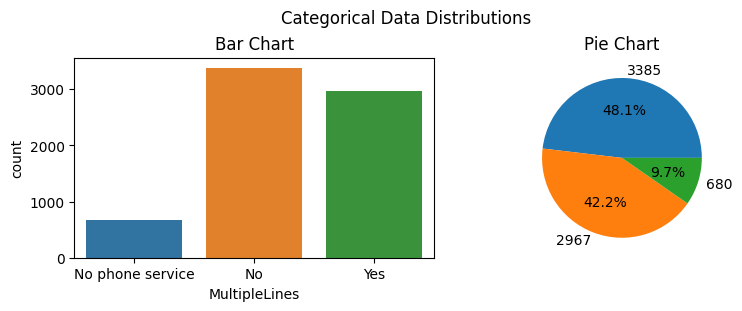

In [142]:
cat_vis_analysis(data,'MultipleLines')

Value counts for column:  InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


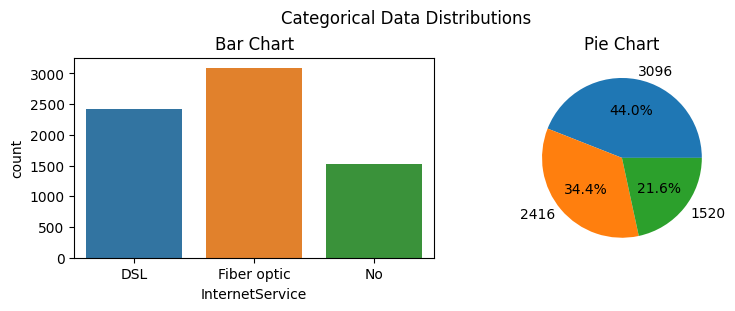

In [144]:
cat_vis_analysis(data,'InternetService')

Value counts for column:  OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


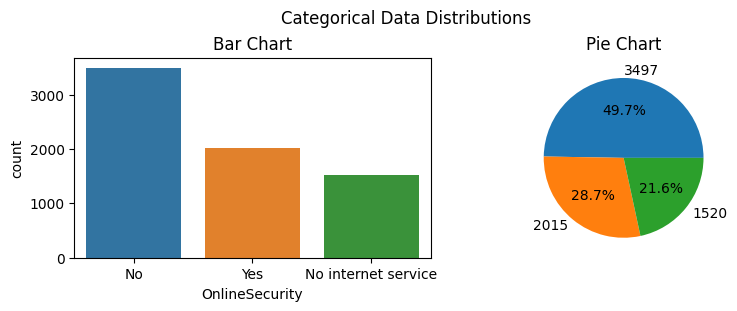

In [146]:
cat_vis_analysis(data,'OnlineSecurity')

Value counts for column:  OnlineBackup
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


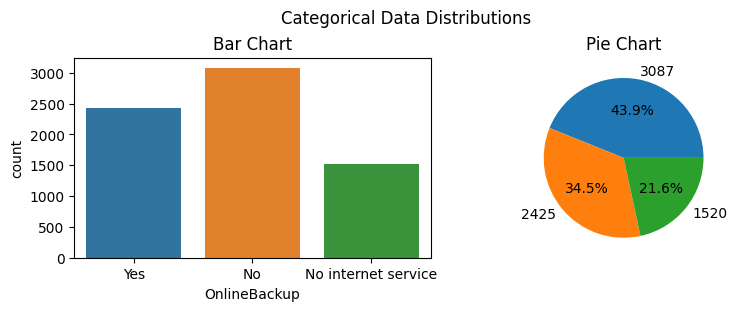

In [148]:
cat_vis_analysis(data,'OnlineBackup')

Value counts for column:  DeviceProtection
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


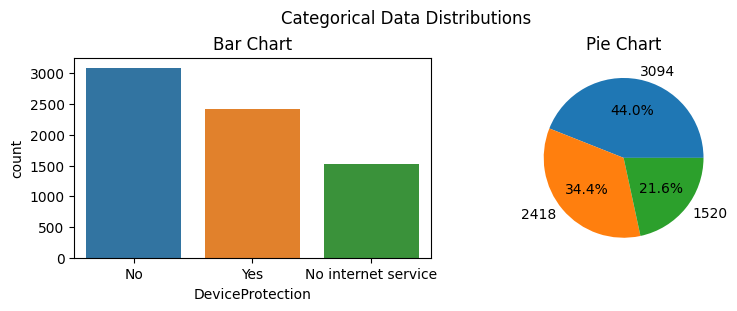

In [150]:
cat_vis_analysis(data,'DeviceProtection')

Value counts for column:  TechSupport
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


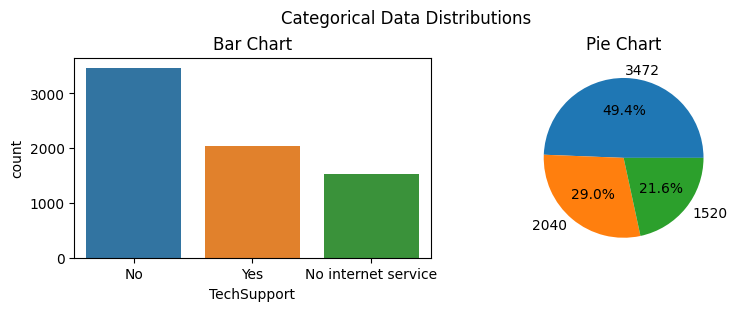

In [152]:
cat_vis_analysis(data,'TechSupport')

Value counts for column:  StreamingTV
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


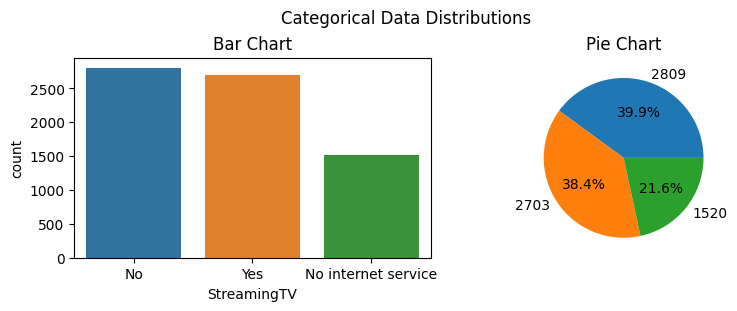

In [154]:
cat_vis_analysis(data,'StreamingTV')

Value counts for column:  StreamingMovies
StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


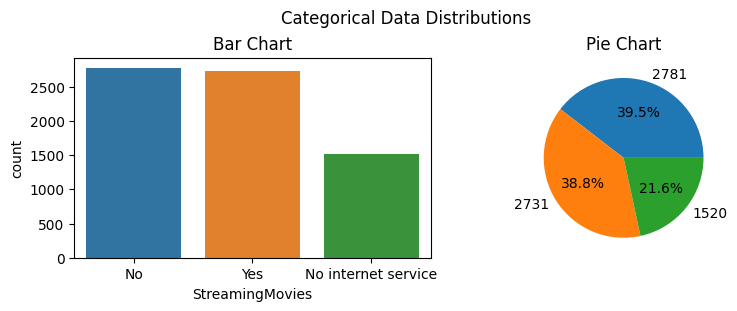

In [156]:
cat_vis_analysis(data,'StreamingMovies')

Value counts for column:  Contract
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


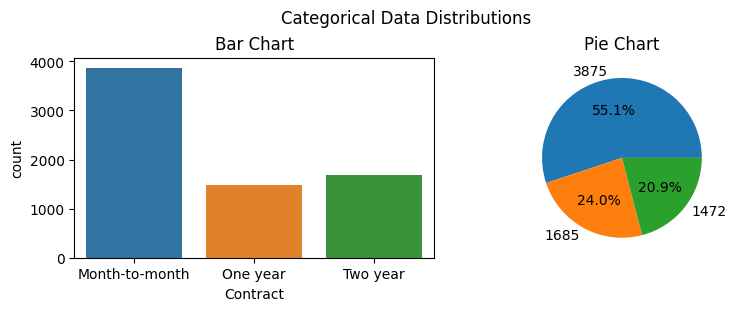

In [158]:
cat_vis_analysis(data,'Contract')

Value counts for column:  PaperlessBilling
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\766283204.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


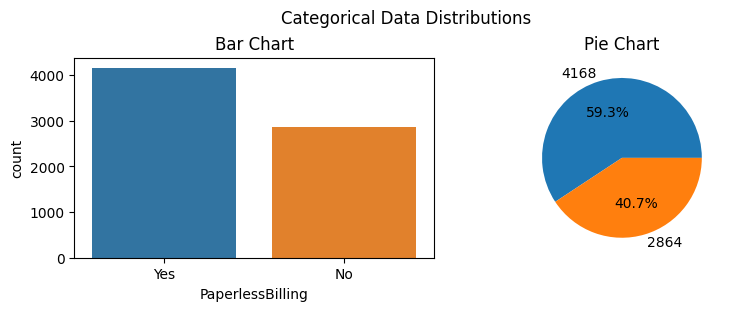

In [160]:
cat_vis_analysis(data,'PaperlessBilling')

Value counts for column:  PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\1826437253.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


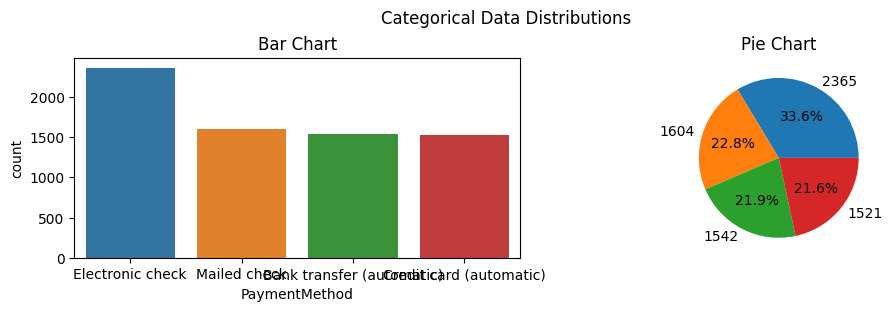

In [166]:
cat_vis_analysis(data,'PaymentMethod')

Value counts for column:  Churn
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Null values in: 
0


C:\Users\rohit\AppData\Local\Temp\ipykernel_4016\1826437253.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


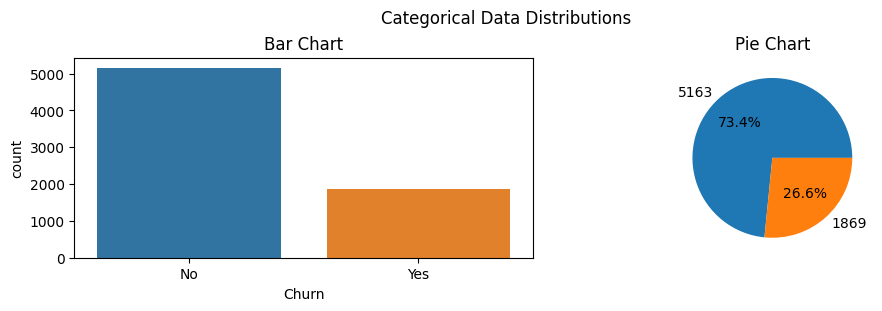

In [170]:
cat_vis_analysis(data,'Churn')

- We've seen all the variables and their distributions/proportions, few are having almost equal proportions
- Few are tend to be binary columns but there is one extra value or category, we can deal with it in preprocessing step based on some business assumptions

### Bi-Variate Analysis

In [87]:
def cont_cont_bivar_analysis(data,col1,col2):
    print(f'Covariance : {data[col1].cov(data[col2])}')
    print(f'Correlation : {data[col1].corr(data[col2])}')
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=col1,y=col2,data=data)
    plt.show()

# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=cat_col,y=num_col,data=data)

In [175]:
data.select_dtypes(include='number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Covariance : 44401.33307254369
Correlation : 0.6510648032262024


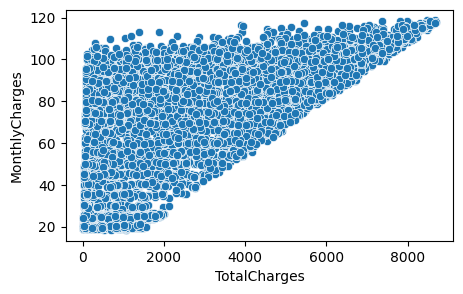

In [71]:
cont_cont_bivar_analysis(data,'TotalCharges','MonthlyCharges')

Covariance : 182.29952560163835
Correlation : 0.24686176664089338


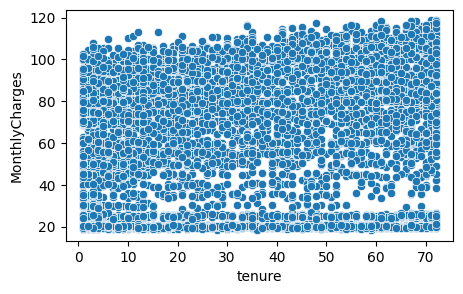

In [69]:
cont_cont_bivar_analysis(data,'tenure','MonthlyCharges')

Covariance : 45950.74323602092
Correlation : 0.8258804609332018


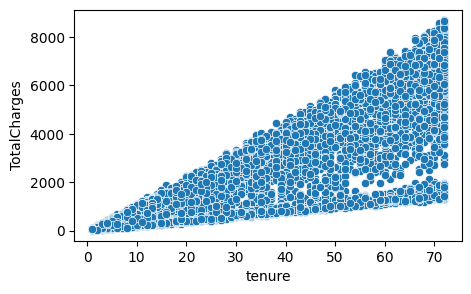

In [177]:
cont_cont_bivar_analysis(data,'tenure','TotalCharges')

### Categorical vs. Continuous Data Analysis

In [199]:
data.select_dtypes(include='object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

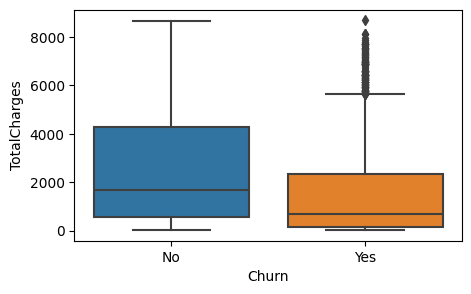

In [203]:
cont_cat_bivar_analysis(data,'Churn','TotalCharges')

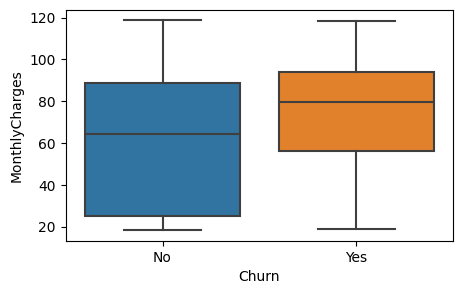

In [205]:
cont_cat_bivar_analysis(data,'Churn','MonthlyCharges')

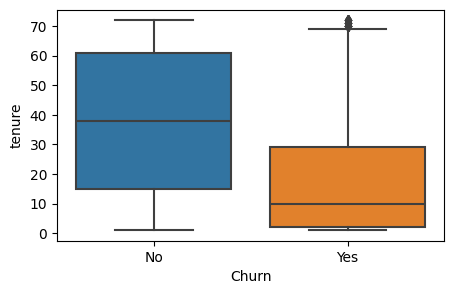

In [207]:
cont_cat_bivar_analysis(data,'Churn','tenure')

In [89]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Preprocessing

In [91]:
Data = data.copy()
Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [93]:
Data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [95]:
Data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
Data['gender'] = data['gender'].replace({'Male': 1, 'Female':0})

C:\Users\rohit\AppData\Local\Temp\ipykernel_20148\2932365565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['gender'] = data['gender'].replace({'Male': 1, 'Female':0})


In [99]:
Data.gender.unique()

array([0, 1], dtype=int64)

In [101]:
# Columns having binary categories are replacing with binary values 1's and 0's

binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 
               'PhoneService', 'PaperlessBilling', 
               'Churn'] 

# For columns with 'Yes'/'No' values
for col in binary_cols:
    Data[col] = Data[col].replace({'Yes': 1, 'No': 0})

C:\Users\rohit\AppData\Local\Temp\ipykernel_20148\2846723392.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data[col] = Data[col].replace({'Yes': 1, 'No': 0})


In [103]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [105]:
Data.value_counts('InternetService')

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [107]:
Data.value_counts('Contract')

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [109]:
# Applying label encoding

contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
Data['Contract'] = Data['Contract'].map(contract_map)

In [111]:
Data.value_counts('PaymentMethod')

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [113]:
Data = pd.get_dummies(Data, columns=['PaymentMethod', 'InternetService'], drop_first=True)

- Dropped one dummy variable per encoded column using **drop_first=True** in **pd.get_dummies()** to avoid dummy variable trap/to prevent perfect multicollinearity (perfect multicollinearity).
- The dropped one can be inferred from the others. 

In [115]:
Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,No phone service,No,Yes,No,...,0,1,29.85,29.85,0,False,True,False,False,False
1,1,0,0,0,34,1,No,Yes,No,Yes,...,1,0,56.95,1889.50,0,False,False,True,False,False
2,1,0,0,0,2,1,No,Yes,Yes,No,...,0,1,53.85,108.15,1,False,False,True,False,False
3,1,0,0,0,45,0,No phone service,Yes,No,Yes,...,1,0,42.30,1840.75,0,False,False,False,False,False
4,0,0,0,0,2,1,No,No,No,No,...,0,1,70.70,151.65,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,No,Yes,...,1,1,84.80,1990.50,0,False,False,True,False,False
7039,0,0,1,1,72,1,Yes,No,Yes,Yes,...,1,1,103.20,7362.90,0,True,False,False,True,False
7040,0,0,1,1,11,0,No phone service,Yes,No,No,...,0,1,29.60,346.45,0,False,True,False,False,False
7041,1,1,1,0,4,1,Yes,No,No,No,...,0,1,74.40,306.60,1,False,False,True,True,False


In [117]:
Data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

- In *"MultipleLines"* column, we have one extra category which is *"No phone service"*, which comes under category - *"No"*
- Because, not having *"phone service"* is nothing but not having *"MultipleLines"*
- So, we can replace the *"No phone service"* category with *"No"* category
- By which it becomes easy to apply encoding on this column

In [119]:


Data[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.unique())

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No phone service,No,Yes,No,No,No,No
1,No,Yes,No,Yes,Yes,Yes,Yes
2,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [ ]:
['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

- Same scenario happens with the above 7 columns as well.
- Because without internet connection it is not possible to provide all these services.

- So, we are replacing this extra category with "No", by we can have only two categories in each column.
- So that it becomes easy to apply encoding 

In [121]:
cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    Data[col] = Data[col].replace({'No phone service': 'No', 'No internet service': 'No'})

In [123]:
Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,No,No,Yes,No,...,0,1,29.85,29.85,0,False,True,False,False,False
1,1,0,0,0,34,1,No,Yes,No,Yes,...,1,0,56.95,1889.50,0,False,False,True,False,False
2,1,0,0,0,2,1,No,Yes,Yes,No,...,0,1,53.85,108.15,1,False,False,True,False,False
3,1,0,0,0,45,0,No,Yes,No,Yes,...,1,0,42.30,1840.75,0,False,False,False,False,False
4,0,0,0,0,2,1,No,No,No,No,...,0,1,70.70,151.65,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,Yes,No,Yes,...,1,1,84.80,1990.50,0,False,False,True,False,False
7039,0,0,1,1,72,1,Yes,No,Yes,Yes,...,1,1,103.20,7362.90,0,True,False,False,True,False
7040,0,0,1,1,11,0,No,Yes,No,No,...,0,1,29.60,346.45,0,False,True,False,False,False
7041,1,1,1,0,4,1,Yes,No,No,No,...,0,1,74.40,306.60,1,False,False,True,True,False


In [93]:
Data.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [490]:
Data.OnlineSecurity.unique()


array(['No', 'Yes'], dtype=object)

In [492]:
Data.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [125]:
cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    Data[col] = Data[col].replace({'Yes': 1, 'No': 0})

C:\Users\rohit\AppData\Local\Temp\ipykernel_20148\3994002456.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data[col] = Data[col].replace({'Yes': 1, 'No': 0})


In [127]:
Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,False,True,False,False,False
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,False,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,1,84.80,1990.50,0,False,False,True,False,False
7039,0,0,1,1,72,1,1,0,1,1,...,1,1,103.20,7362.90,0,True,False,False,True,False
7040,0,0,1,1,11,0,0,1,0,0,...,0,1,29.60,346.45,0,False,True,False,False,False
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,74.40,306.60,1,False,False,True,True,False


In [129]:
Data.drop('TotalCharges', inplace = True, axis = 1)

- As correlation of 0.82 between tenure and total_charges, they're highly collinear, giving almost the same info.
- So, we can drop *total_charges* and keep *tenure*
- Which helps us to Avoid *multicollinearity* – helps Logistic Regression behave better

In [131]:
Data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,29.85,0,False,True,False,False,False
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,56.95,0,False,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,53.85,1,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,42.30,0,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,70.70,1,False,True,False,True,False


In [133]:
x = Data.drop('Churn',axis=1)
y = Data['Churn']
x.shape, y.shape

((7032, 21), (7032,))

In [135]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,29.85,False,True,False,False,False
1,1,0,0,0,34,1,0,1,0,1,...,0,0,1,0,56.95,False,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,0,0,0,1,53.85,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,0,0,1,0,42.30,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,70.70,False,True,False,True,False


In [137]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

**Train Test Split**

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# specifying numerical columns
num_cols = ['tenure', 'MonthlyCharges']  
other_cols = [col for col in x.columns if col not in num_cols]

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialized the scaler
scaler = StandardScaler()

# Fit and transform only numerical columns in training data
x_train_scaled_num = scaler.fit_transform(x_train[num_cols])
x_test_scaled_num = scaler.transform(x_test[num_cols])

# Combine scaled numerical columns with unscaled other columns

x_train_scaled = pd.DataFrame(x_train_scaled_num, columns=num_cols, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled_num, columns=num_cols, index=x_test.index)

x_train_final = pd.concat([x_train_scaled, x_train[other_cols]], axis=1)
x_test_final = pd.concat([x_test_scaled, x_test[other_cols]], axis=1)

In [141]:
pd.set_option('display.max_columns',None)
x_train_final.head()

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
3946,-0.952316,-0.202600,0,0,0,0,0,0,1,0,1,1,1,1,0,0,False,False,True,False,False
3394,-0.262207,-0.101327,1,0,0,0,1,1,1,1,0,0,0,0,1,0,False,True,False,False,False
1635,-1.195884,0.177587,0,0,0,0,1,0,0,0,1,0,1,1,1,1,False,True,False,False,False
4088,-1.033505,0.298782,1,0,0,0,1,1,0,0,0,0,0,0,0,0,False,True,False,True,False
1886,1.402172,-0.139512,1,0,1,1,1,0,1,0,1,1,0,0,2,1,False,False,False,False,False


In [143]:
pd.set_option('display.max_columns',None)
x_test_final.head()

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
2481,1.158605,-1.314936,1,1,1,0,1,1,0,0,0,0,0,0,2,0,False,False,False,False,True
6784,-0.546370,-1.324897,0,0,0,0,1,1,0,0,0,0,0,0,0,0,False,False,False,False,True
6125,-0.789938,1.250078,1,0,1,0,1,1,0,0,1,0,1,1,0,1,True,False,False,True,False
3052,0.184334,-0.317154,1,0,1,0,1,1,1,0,0,0,0,0,0,1,False,False,True,False,False
4099,-1.074100,-1.167178,0,0,0,0,0,0,1,0,0,0,0,0,0,0,False,False,False,False,False


In [145]:
print(x_train_final.shape,y_train.shape)
print(x_test_final.shape,y_test.shape)

(4922, 21) (4922,)
(2110, 21) (2110,)


**Now we're done with the data preprocessing ✅**

In [147]:
x_train_final

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
3946,-0.952316,-0.202600,0,0,0,0,0,0,1,0,1,1,1,1,0,0,False,False,True,False,False
3394,-0.262207,-0.101327,1,0,0,0,1,1,1,1,0,0,0,0,1,0,False,True,False,False,False
1635,-1.195884,0.177587,0,0,0,0,1,0,0,0,1,0,1,1,1,1,False,True,False,False,False
4088,-1.033505,0.298782,1,0,0,0,1,1,0,0,0,0,0,0,0,0,False,True,False,True,False
1886,1.402172,-0.139512,1,0,1,1,1,0,1,0,1,1,0,0,2,1,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,-1.195884,-0.471553,1,0,0,0,1,1,0,0,0,0,0,0,0,0,False,False,False,False,False
5199,0.752658,1.557215,0,0,0,0,1,1,0,1,1,1,1,1,1,1,False,True,False,True,False
5235,-0.952316,0.549472,1,0,0,0,1,1,1,0,0,0,0,0,0,1,False,True,False,True,False
5399,0.712064,-1.489257,0,0,0,0,1,0,0,0,0,0,0,0,1,0,False,False,False,False,True


In [149]:
x_test_final

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
2481,1.158605,-1.314936,1,1,1,0,1,1,0,0,0,0,0,0,2,0,False,False,False,False,True
6784,-0.546370,-1.324897,0,0,0,0,1,1,0,0,0,0,0,0,0,0,False,False,False,False,True
6125,-0.789938,1.250078,1,0,1,0,1,1,0,0,1,0,1,1,0,1,True,False,False,True,False
3052,0.184334,-0.317154,1,0,1,0,1,1,1,0,0,0,0,0,0,1,False,False,True,False,False
4099,-1.074100,-1.167178,0,0,0,0,0,0,1,0,0,0,0,0,0,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.280389,0.546152,1,0,1,1,1,0,1,1,0,0,0,0,0,0,False,True,False,True,False
6747,0.793253,-0.967953,0,0,1,0,0,0,1,0,1,0,0,0,1,0,False,False,True,False,False
1700,0.590280,-1.466014,1,0,0,0,1,0,0,0,0,0,0,0,2,0,False,False,False,False,True
1099,-1.114695,-0.295571,1,0,1,1,1,1,0,0,0,1,0,0,0,1,False,False,True,False,False


In [151]:
y_train

3946    1
3394    0
1635    0
4088    1
1886    0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 4922, dtype: int64

**Model Training**
- Training Logistic Regression using Ridge Regularization

**Ridge Regularization**

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Ridge = L2 penalty
ridge_model = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=42)
ridge_model.fit(x_train_final, y_train)

# Predict
y_pred_ridge = ridge_model.predict(x_test_final)

# Evaluate
print("Ridge Logistic Regression (L2) Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ridge))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ridge))


Ridge Logistic Regression (L2) Results:
Confusion Matrix:
[[1111  438]
 [ 111  450]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



**This project has been deployed on Hugging Face. Please refer to the link below to explore it further.**

https://huggingface.co/spaces/rohithmasineni/Customer_Churn_Predictor